<a href="https://colab.research.google.com/github/tulubenti/Engage3/blob/master/Breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast cancer detection

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Upload the data 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [8]:
from google.colab import files
BC_data = files.upload() 

Saving BC_data.csv to BC_data.csv


In [0]:
BC_data = pd.read_csv('BC_data.csv')

In [14]:
BC_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
#Count the number of rows and columns in the data set
BC_data.shape

(569, 33)

In [18]:
#Count the empty (NaN, NAN, na) values in each column
BC_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
# Drop the column with all missing data, that is, 'unnamed'.
BC_data = BC_data.dropna(axis =1)

In [21]:
BC_data.shape

(569, 32)

In [23]:
#Get a count of the number of Malignant (M) (harmful) or Benign (B) cells (not harmful)
BC_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

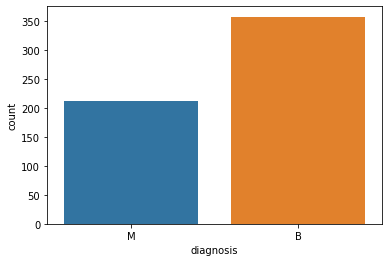

In [25]:
#Visualize this count
sns.countplot(BC_data['diagnosis'], label ='Count')
plt.show()

In [26]:
#Look at the data types to see which columns need to be transformed / encoded to a number
BC_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [29]:
#Transform/ Encode the column diagnosis
#Encoding categorical data values (Transforming categorical data/ Strings to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
BC_data.iloc[:,1] = labelencoder_y.fit_transform(BC_data.iloc[:,1].values)
print(labelencoder_y.fit_transform(BC_data.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

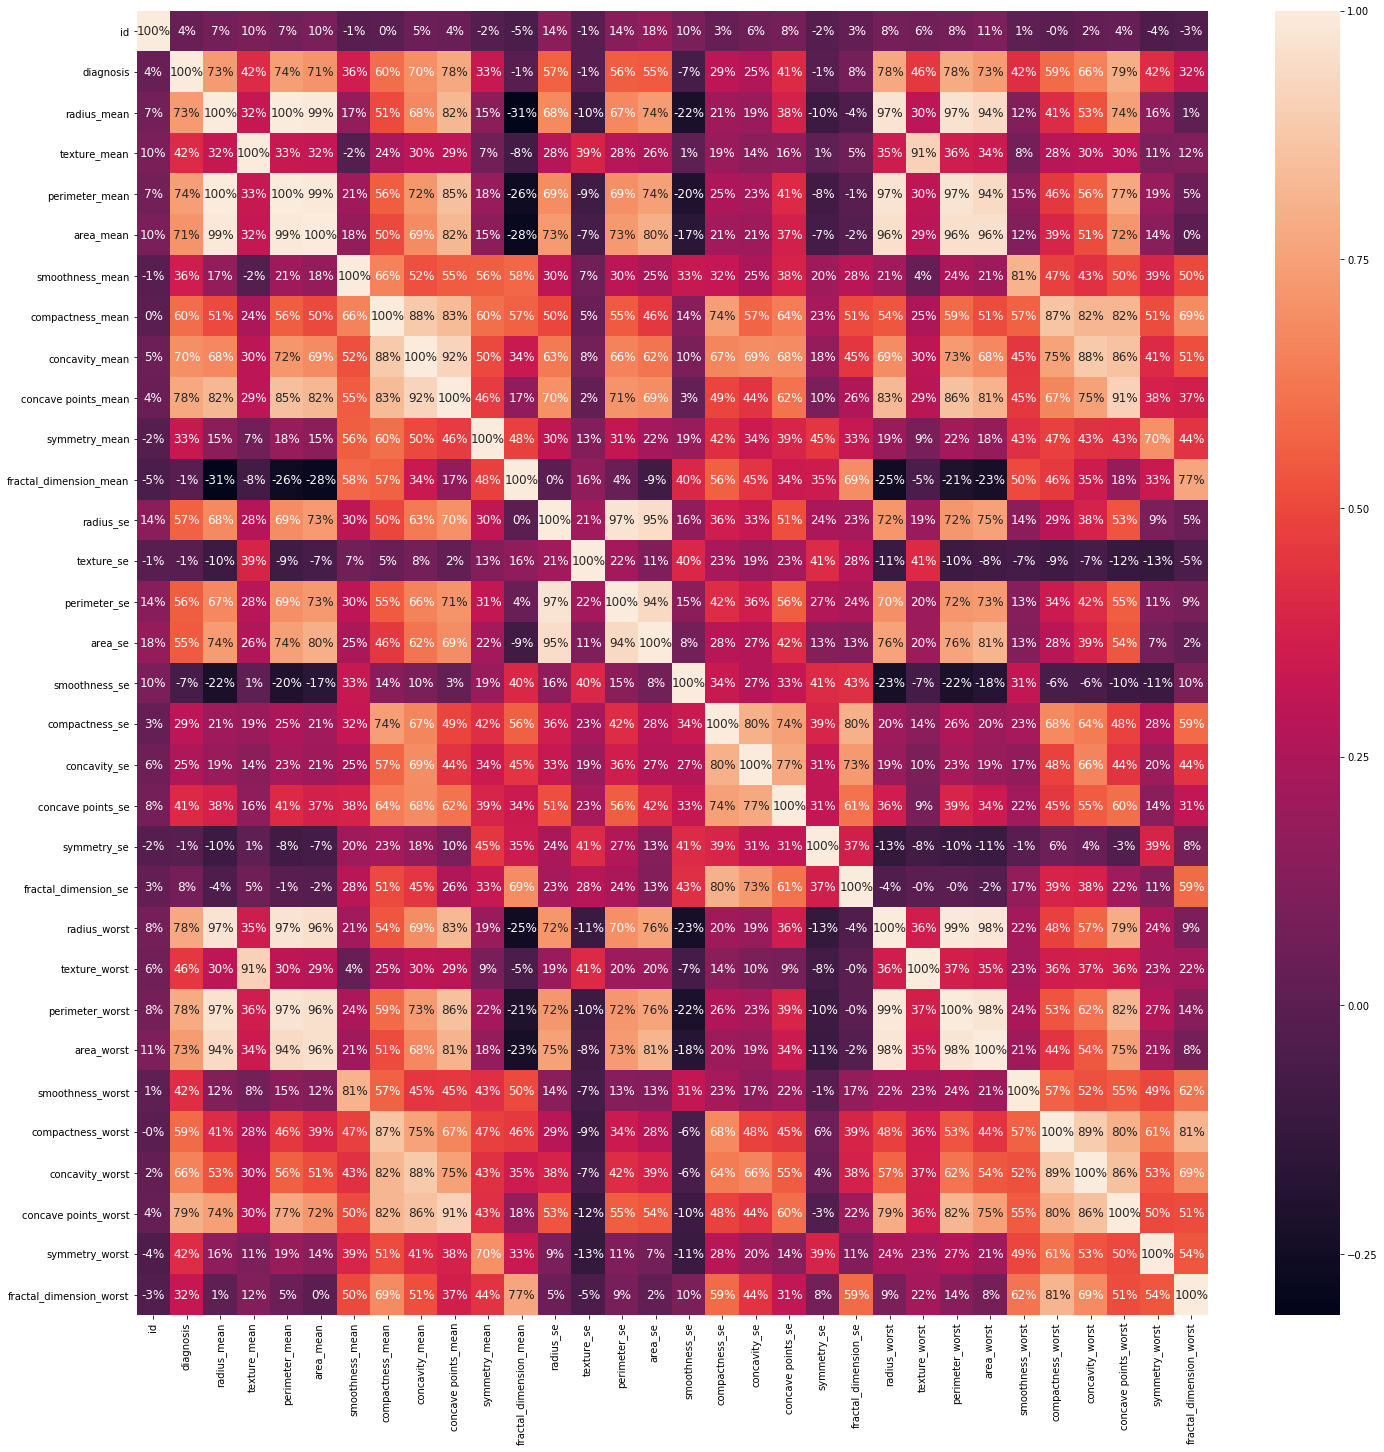

In [35]:
#Visualize the correlation 
#NOTE: To see the numbers within the cell ==>  sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(24,24))
sns.heatmap(BC_data.corr(), annot= True, annot_kws= {'size':12}, fmt= '.0%')
plt.show()

In [36]:
#Split the data into independent 'X' and dependent 'Y' variables
X = BC_data.drop(['id','diagnosis'], axis =1)     #Removing the id column & diagnosis
Y = BC_data['diagnosis']                         #Get the target variable 'diagnosis'
X.shape, Y.shape, type(X), type(Y)

((569, 30), (569,), pandas.core.frame.DataFrame, pandas.core.series.Series)

In [0]:
# Split the data set into 75% training set and 25% testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 101)

In [0]:
#Standardize features by removing the mean and scaling to unit variance
#The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [46]:
# Check the scaled values of X_train and X_test
X_train

array([[-0.24158009, -0.25233871, -0.28593015, ..., -0.14257025,
        -1.07012426, -0.82628364],
       [-0.39595215, -0.49936108, -0.43539869, ..., -0.23352397,
         0.57196643, -0.60536547],
       [ 0.21592257, -0.38162145,  0.18779528, ..., -0.46781709,
         1.09553158, -0.62991193],
       ...,
       [ 0.57238169,  0.077794  ,  0.52348693, ...,  0.57868208,
        -0.41170142, -1.11975024],
       [ 1.33020818,  0.48872842,  1.29124883, ...,  1.38041098,
         1.2208699 ,  0.78014602],
       [-0.09001479, -0.14614217, -0.10419927, ...,  0.22033355,
        -0.09597577,  0.32249085]])

In [48]:
X_test

array([[-0.60856611, -0.16219339, -0.63793011, ..., -0.49665356,
         0.18680362, -0.62894165],
       [-0.11105729, -0.7728038 , -0.18011613, ..., -0.64862222,
        -0.2583254 , -0.600271  ],
       [-0.4456912 , -0.68932191, -0.48830103, ..., -0.52846095,
         0.25754117, -0.76702885],
       ...,
       [ 0.9431876 ,  0.98031593,  1.0619753 , ...,  1.27318984,
        -0.98985526,  2.32881612],
       [-0.8277069 , -0.24806048, -0.74972684, ...,  0.38196813,
        -0.37047031,  0.59102372],
       [ 0.32130157,  0.44364662,  0.37759227, ...,  1.48523915,
         0.22130974,  1.29901322]])

In [0]:
#Create a function within many Machine Learning Models

def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 101)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 101)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 101)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 101)
  forest.fit(X_train, Y_train)
    
    #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [64]:
len(models(X_train,Y_train))

[0]Logistic Regression Training Accuracy: 0.9859154929577465
[1]K Nearest Neighbor Training Accuracy: 0.9741784037558685
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9835680751173709
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[4]Gaussian Naive Bayes Training Accuracy: 0.9483568075117371
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9976525821596244


7

In [65]:
model = models(X_train,Y_train)

#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[0]Logistic Regression Training Accuracy: 0.9859154929577465
[1]K Nearest Neighbor Training Accuracy: 0.9741784037558685
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9835680751173709
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[4]Gaussian Naive Bayes Training Accuracy: 0.9483568075117371
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9976525821596244
[[88  0]
 [ 1 54]]
Model[0] Testing Accuracy = "0.993006993006993!"

[[87  1]
 [ 5 50]]
Model[1] Testing Accuracy = "0.958041958041958!"

[[87  1]
 [ 1 54]]
Model[2] Testing Accuracy = "0.986013986013986!"

[[88  0]
 [ 2 53]]
Model[3] Testing Accuracy = "0.986013986013986!"

[[86  2]
 [ 5 50]]
Model[4] Testing Accuracy = "0.951048951048951!"

[[86  2]
 [ 6 49]]
Model[5] Testing Accuracy = "0.9440559440559441!"

[[86  2]
 [ 4 51]]
Model[6] Testing Accuracy = "0.958041958041958!"



In [66]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      0.98      0.99        55

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

0.993006993006993

Model  1
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.98      0.91      0.94        55

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

Model  2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        55

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted 

In [68]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1]

107    0
437    0
195    0
141    1
319    0
      ..
56     1
116    0
468    1
469    0
417    1
Name: diagnosis, Length: 143, dtype: int64
